In [1]:
#导入
from Photometry_Periodogram import Periodogram
from Photometry_Periodogram import Photometry
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


d:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 测光+周期

In [ ]:
#如果需要裁剪可以调用Photometry.Crop，然后重新导入数据

Data = Photometry(path='E:/观测素材/2023-03-10/LIGHT_cut')
#裁剪
Data.Crop(2500,'center',[0,47],[10000],[10000])

#### Target2 J092216-0633.6

In [ ]:
#重新导入裁剪后数据(注意路径结尾不需要加'/')
Data = Photometry(crop_path='E:/观测素材/2023-03_all_data')
#第一张图片中目标星和参考星的坐标
Pos_y0 = np.array([800, 788, 142, 401, 731, 652, 1485, 447])
Pos_x0 = np.array([800, 505, 1226,1175,1077,1233, 436,217])
#导入参考星的标准星等，如果只关注星等相对变化则可以输入正确数量的0
ref_mag = np.array([12.417,11.929,10.98,11.47,12.78,11.95,11.664])
#星点位置寻找，输入初始位置，输出每张图中星点的精确位置及FWHM
Data.Detect(Posr0=Pos_y0,Posc0=Pos_x0,search_radius=50,flag_check=False,use_low_std=True)

In [ ]:
Data = Photometry(crop_path='E:/观测素材/2023-03_all_data')
#第一张图片中目标星和参考星的坐标
Pos_y0 = np.array([800, 788, 142, 401, 731, 652, 1485, 447])
Pos_x0 = np.array([800, 505, 1226,1175,1077,1233, 436,217])
#导入参考星的标准星等，如果只关注星等相对变化则可以输入正确数量的0
ref_mag = np.array([12.417,11.929,10.98,11.47,12.78,11.95,11.664])
#孔径测光，输入参考星等，输出光变曲线(T,Mag,Err)
Data.Aperture_photometry(ref_mag=ref_mag)

Amp = 1.00533 , Period = 0.03575 , Phi0 = 1.16581 , Offset = 9.99769 


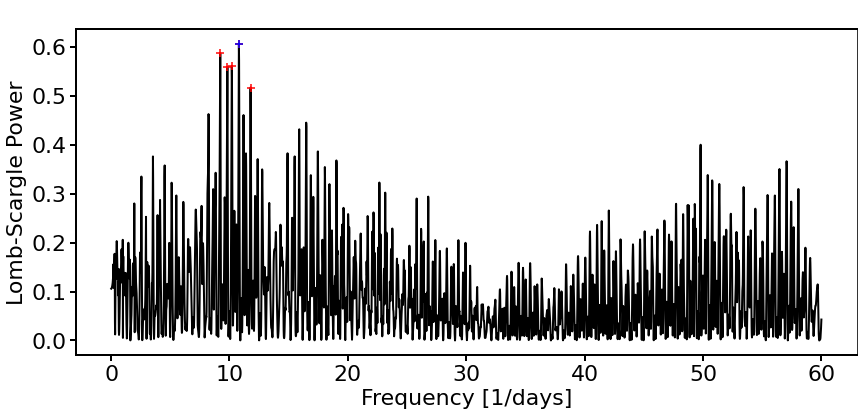

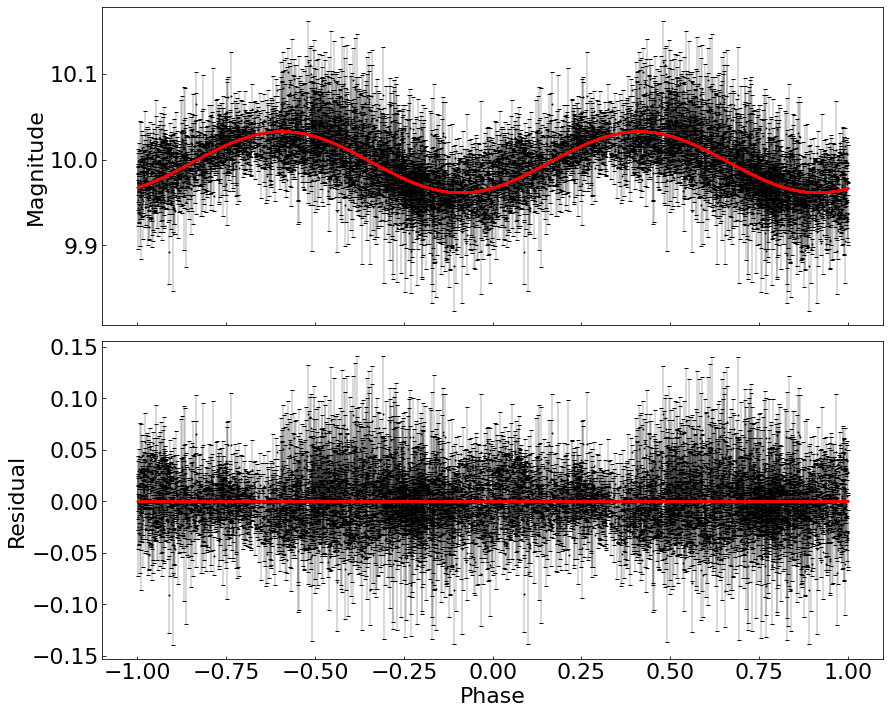

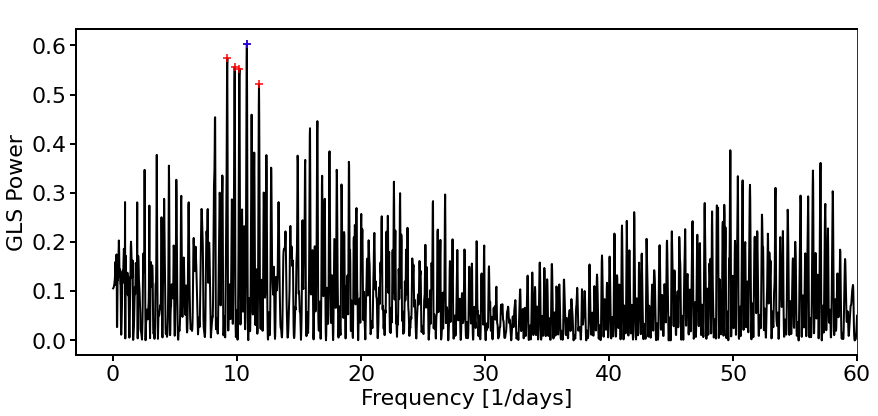

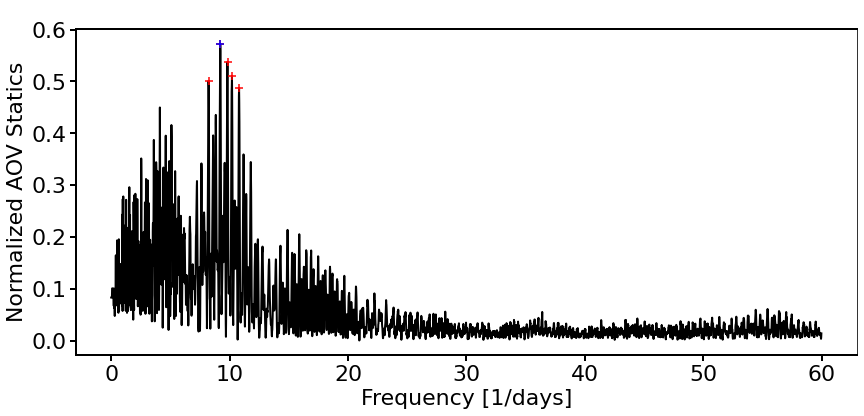

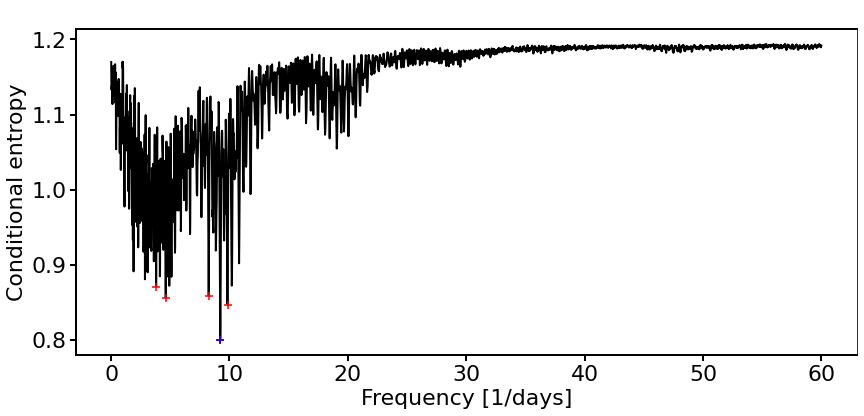

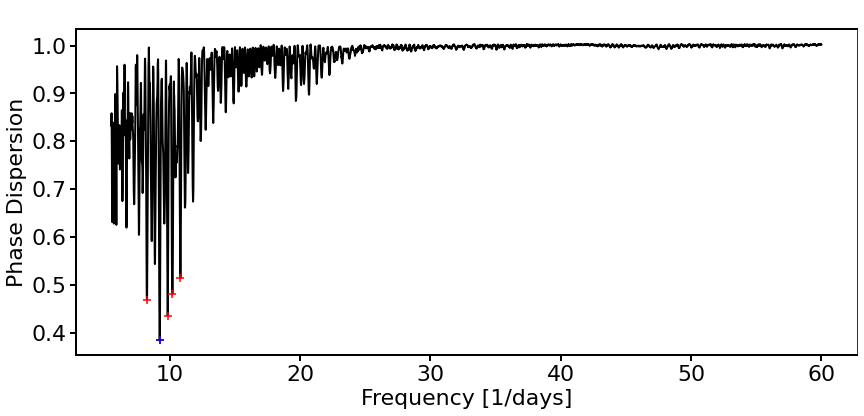

In [2]:
#跑了上一步测光，已经生成了对应光变曲线的数据文件，自动读取之前保存路径的文件
P = Periodogram()
#五种方法对应的函数以及参数示例，可以选择画出功率谱以及拟合残差图，
#输出中LS[0]对应功率谱的数据，LS[1]对应峰的位置，LS[2]对应峰值功率的高斯拟合半高全宽
#针对五种方法可以返回功率谱峰值的高斯拟合的半高全宽，对应峰值频率的弥散

LS = P.LombScargleMethod(0.01,60,4000,5,PowerPlot=True,residual=True,Savefig=False,Save_residual=False,Error_Fit=True,Title=' ')#频率起始点、频率截止点、频率点个数、输出周期个数
GLS = P.GeneralisedLombScargleMethod((-3,60),5,PowerPlot=True,residual=False,Savefig=False,Save_residual=False,Error_Fit=True,Title=' ')#画图频率范围、输出周期个数
AOV = P.aovwmp(5,3,0.01,60,4000,5,PowerPlot=True,residual=False,Savefig=False,Save_residual=False,Error_Fit=True,Title=' ')#谐波阶数（npar）和亚分箱数（ncov）、输出周期个数
CE = P.ConditionEntropyMethod(0.01,60,4000,5,PowerPlot=True,residual=False,Savefig=False,Save_residual=False,Error_Fit=True,Title=' ')#频率起始点、频率截止点、频率点个数、输出周期个数
PDM = P.PDMMethod(5.5,60,4000,5,PowerPlot=True,residual=False,Savefig=False,Save_residual=False,Error_Fit=True,Title=' ')#频率起始点、频率截止点、频率点个数、输出周期个数

In [10]:
#对比五种方法结果的函数，输出对应方法的峰值功率（周期）及其误差
#MaxPlot_P以及MaxPlot_F可以画出周期及频率的对比图
P = Periodogram()
Results = P.DifferentMethodsCompare(5.5,60,4000,5,PowerPlot=False)#频率起始点、频率截止点、频率点个数、输出周期个数

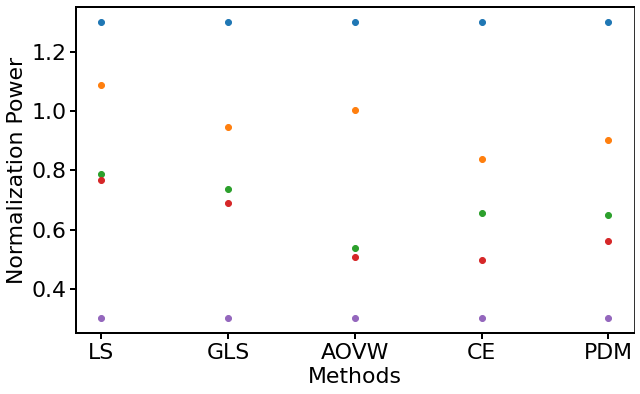

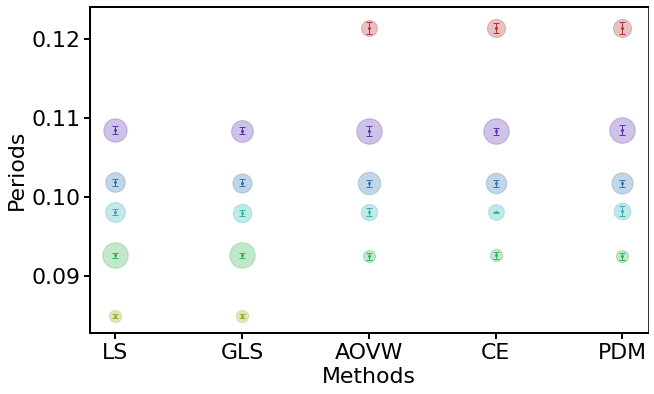

In [23]:
R = P.Normalization_Power_plot(Results,0.3,1.3,PowerPlot=True,Color_Plot=True,Save=True)#周期结果、功率归一化下限、功率归一化上限

In [32]:
np.around(Results[1][:,0],5)#周期结果

array([[0.09258, 0.10845, 0.09802, 0.10183, 0.08487],
       [0.09257, 0.10838, 0.10181, 0.09798, 0.08487],
       [0.1083 , 0.1017 , 0.09803, 0.12138, 0.09247],
       [0.10829, 0.10169, 0.12137, 0.09802, 0.09258],
       [0.10846, 0.1017 , 0.12138, 0.09816, 0.09247]])

#### Target1 J081813-0049.5

Amp = 0.99433 , Period = 0.07045 , Phi0 = 0.78429 , Offset = 10.17417 


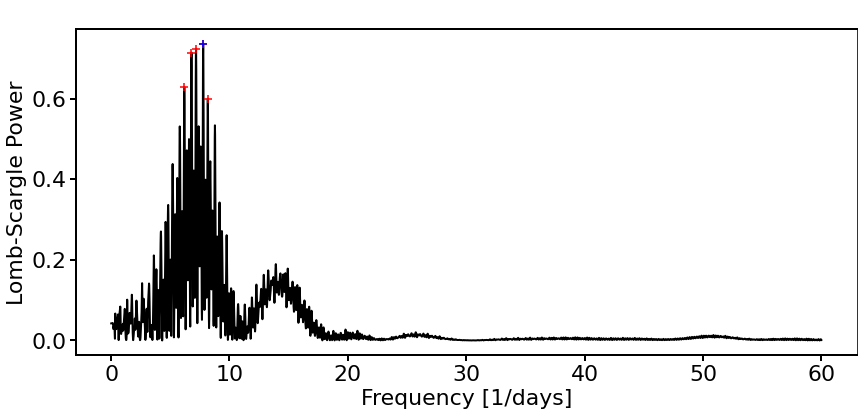

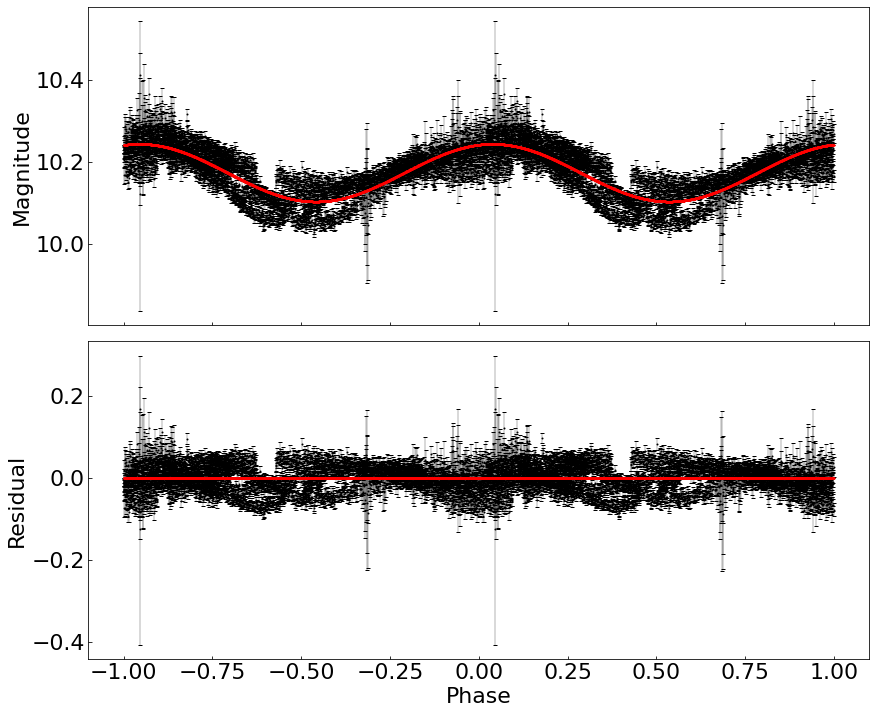

In [4]:
#使用导入的文件
T = np.load('Result_lp/T.npy')
Mag = np.load('Result_lp/Mag.npy')
Err = np.load('Result_lp/Err.npy')

LS = Periodogram(T,Mag,Err).LombScargleMethod(0.01,60,4000,PowerPlot=True,residual=True,Savefig=True,Save_residual=True,Title=' ')
# GLS = Periodogram(T,Mag,Err).GeneralisedLombScargleMethod((-3,60),PowerPlot=True,residual=False,Savefig=True,Save_residual=False,Title=' ')
# AOV = Periodogram(T,Mag,Err).aovwmp(5,3,0.01,60,4000,PowerPlot=True,residual=False,Savefig=True,Save_residual=False,Title=' ')
# CE = Periodogram(T,Mag,Err).ConditionEntropyMethod(5,60,4000,5,PowerPlot=True,residual=False,Savefig=True,Save_residual=False,Title=' ')
# PDM = Periodogram(T,Mag,Err).PDMMethod(5,60,4000,PowerPlot=True,residual=False,Savefig=True,Save_residual=False,Title=' ')

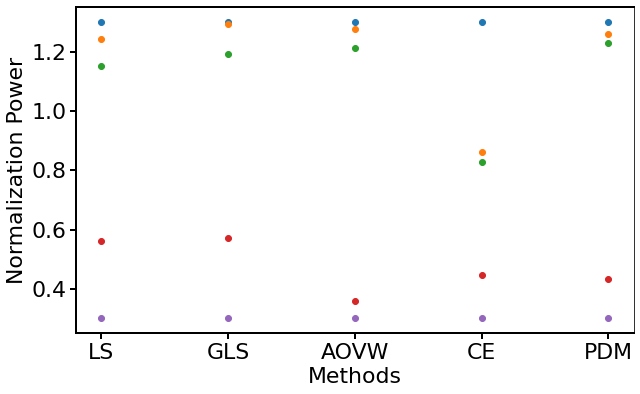

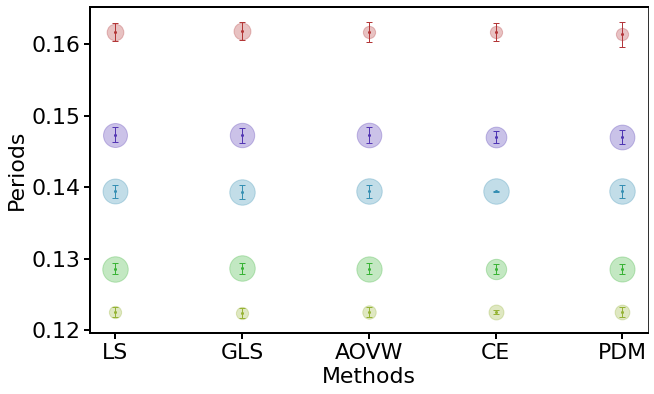

In [22]:
T = np.load('Result_lp/T.npy')
Mag = np.load('Result_lp/Mag.npy')
Err = np.load('Result_lp/Err.npy')

Results1 = Periodogram(T,Mag,Err).DifferentMethodsCompare(5,60,4000,5,PowerPlot=False)
R = Periodogram(T,Mag,Err).Normalization_Power_plot(Results1,0.3,1.3,PowerPlot=True,Color_Plot=True,Save=True)

Amp = 1.00071 , Period = 0.07048 , Phi0 = 1.15197 , Offset = 10.17439 


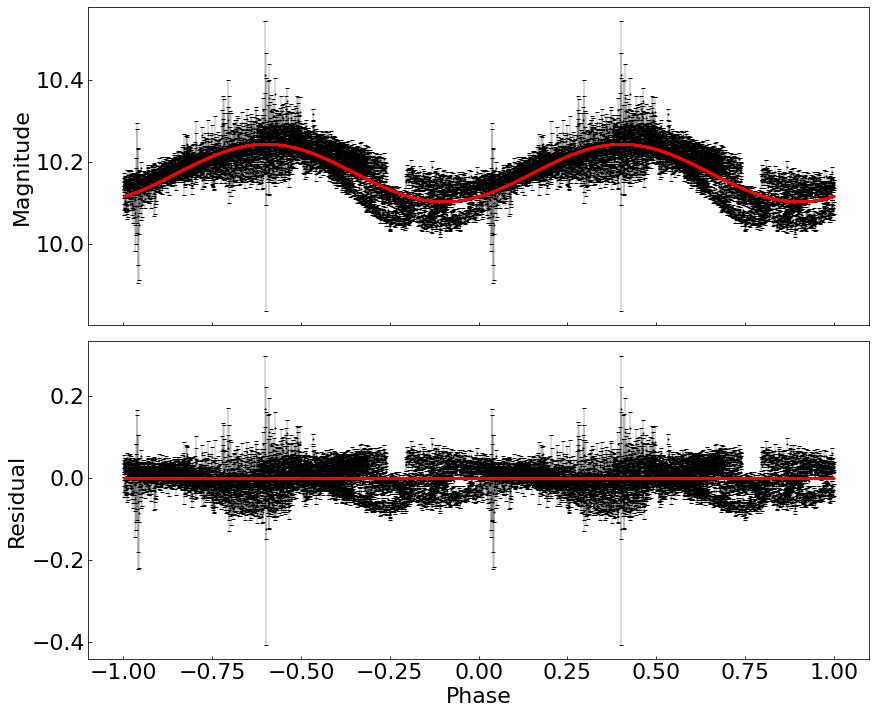

In [3]:
T = np.load('Result_lp/T.npy')
Mag = np.load('Result_lp/Mag.npy')
Err = np.load('Result_lp/Err.npy')
#相位拟合函数的使用
Periodogram(T,Mag,Err).Phase_Residual(0.12859,Save=True)


### ASAS

#### J081813-0049.6

In [2]:
data1 = pd.read_csv('../Data_ASAS/J081813-0049.6_star1.txt',sep=' ')
data1['label']='A'

Mag = data1['mag1'].values
Err = data1['err1'].values
Time = data1['time'].values
Time = Time[Mag<10.75]
Err = Err[Mag<10.75]
Mag = Mag[Mag<10.75]

plt.figure(figsize=(14,6))
plt.errorbar(Time,Mag,Err,fmt='k.',capsize=2,elinewidth=0.3,ecolor='k',markersize=3,capthick=0.3)

In [5]:
AOV = Periodogram(Time,Mag,Err).aovwmp(5,3,1,60,590000,PowerPlot=True,residual=True,Savefig=True,Save_residual=True,Title=' ')

In [63]:
1/AOV[1]

array([0.13960241, 0.16232449, 0.19378343, 0.12246048, 0.10910003])

#### J092216-0633.6

<ErrorbarContainer object of 3 artists>

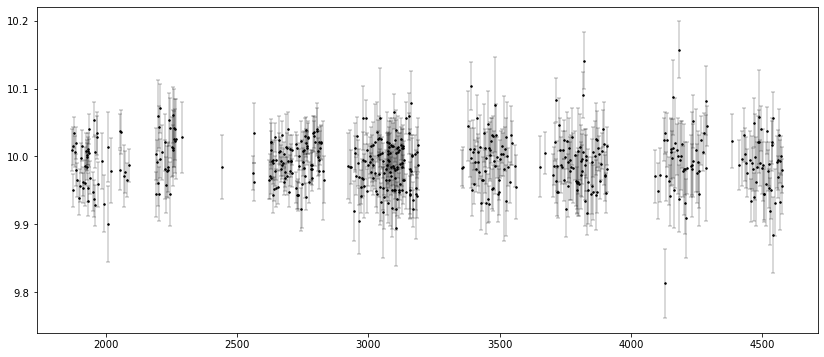

In [22]:
data2 = pd.read_csv('../Data_ASAS/J092216-0633.6_star2.txt',sep=' ')
data2['label']='A'
Mag2 = data2['mag1'].values
Err2 = data2['err1'].values
Time2 = data2['time'].values
Time2 = Time2[Mag2<10.2]
Err2 = Err2[Mag2<10.2]
Mag2 = Mag2[Mag2<10.2]

plt.figure(figsize=(14,6))
plt.errorbar(Time2,Mag2,Err2,fmt='k.',capsize=2,elinewidth=0.3,ecolor='k',markersize=3,capthick=0.3)

Amp = 0.99251 , Period = 0.03367 , Phi0 = -2.22521 , Offset = 9.99028 


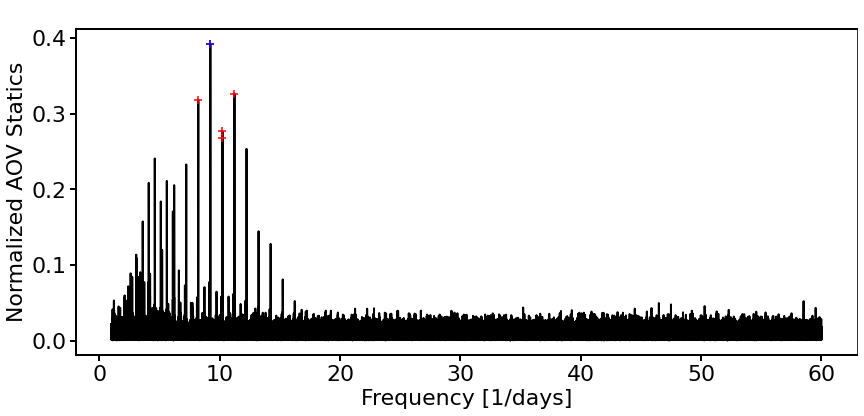

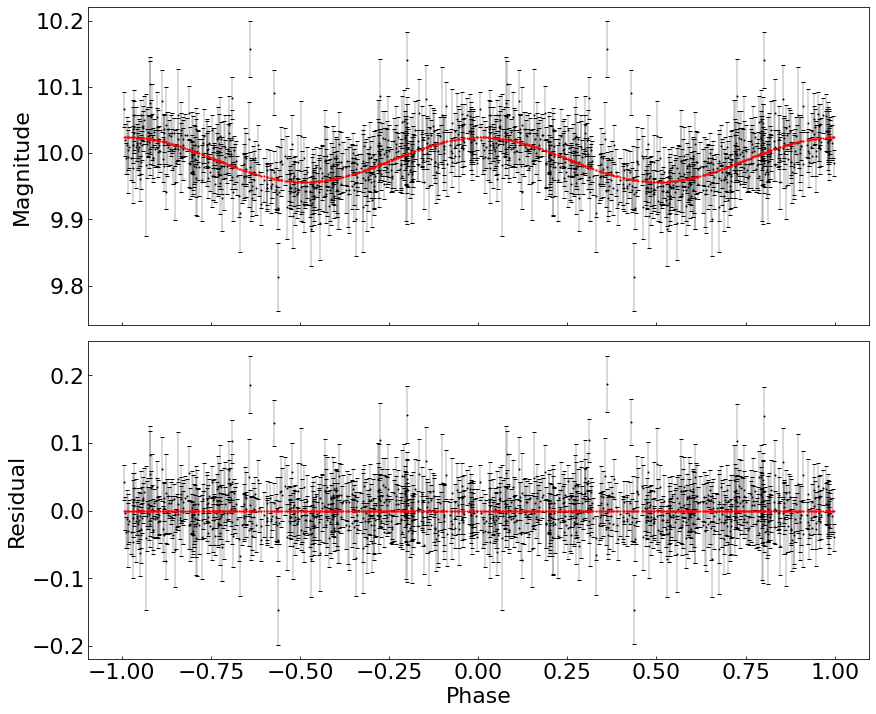

In [23]:
AOV = Periodogram(Time2,Mag2,Err2).aovwmp(5,3,1,60,590000,5,PowerPlot=True,residual=True,Savefig=True,Save_residual=False,Error_Fit=False,Title=' ')

In [25]:
1/AOV[1]

array([0.10826143, 0.08897035, 0.12144471, 0.09766006, 0.09768487])

Amp = 0.99174 , Period = -0.02772 , Phi0 = 1.20341 , Offset = 9.99050 


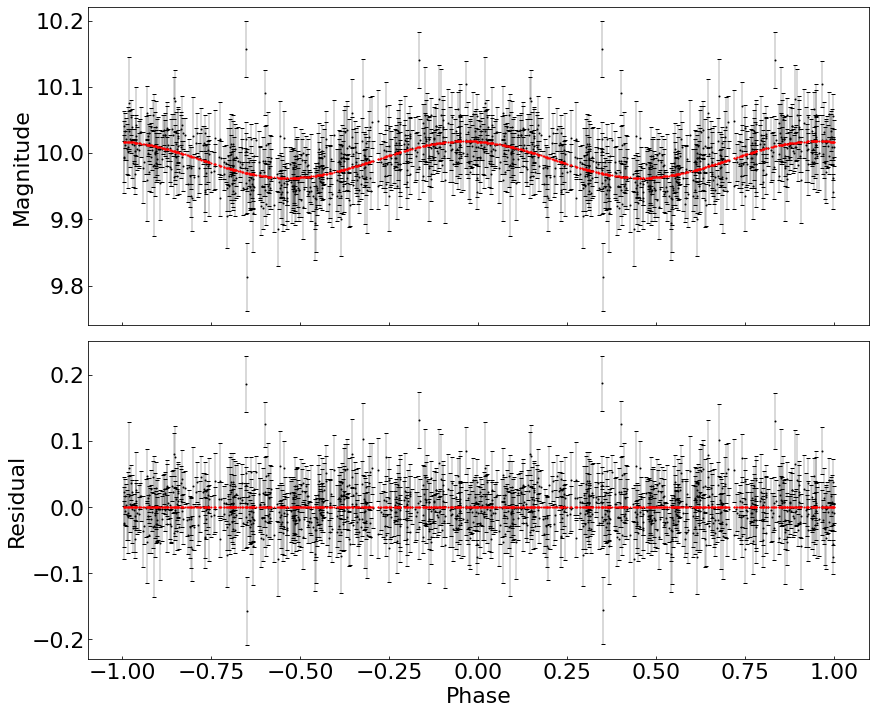

In [26]:
Periodogram(Time2,Mag2,Err2).Phase_Residual(0.09766006,Save=True)
# Periodogram(Time2,Mag2,Err2).Phase_Residual(0.09768487,Save=True)